## Homework 08

In [1]:
from joy import *

## Problem 1

Write a recursive function `circle_clouds` to draw the figure shown below. 

The function should take two arguments `r`, the radius of the circle at the centre and `n`, the number of times to repeat the recursive process. For each turn, it draws a circle in the centre and draw a smaller version of itself with half the size on the left and right ends.

Hint: Use `fill="white"` to fill the circles.


![](images/hw08-circle-clouds.svg)

`circle_clouds(r=75, n=5)`


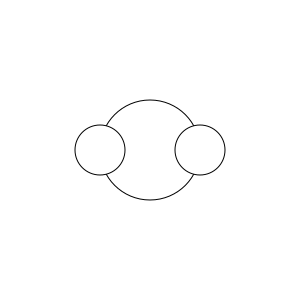

In [4]:
r=50

a=circle(r=r, fill="white")
b=circle(x=-r, r=r/2, fill="white")
c = circle(x=r, r=r/2, fill="white")
a+b+c



In [5]:
def circle_clouds(r, n):
    a=circle(r=r, fill="white")
    if n>1:
        b=circle_clouds(r=r/2, n=n-1)|translate(x=-r)
        c = circle_clouds(r=r/2, n=n-1)|translate(x=r)
        return a+b+c
    else:
        return a

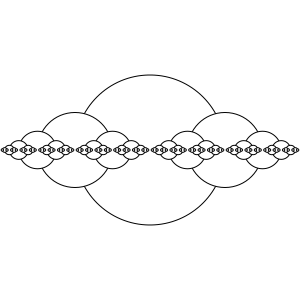

In [6]:
circle_clouds(75, 7)

## Problem 2

What happens if you modify the above `circle_clouds` function to draw three smaller shapes, seperated by $120\degree$ instead of two?

Can you write a function `circle_clouds_3` to achive that? 

How does the figure look like when you call `circle_clouds_3(r=75, n=5)`?

In [3]:
def circle_clouds_3(r, n, k=3):
    a=circle(r=r, fill=color(255,0,0,1/k), stroke="none")
    if n>1:
        b=circle_clouds_3(r=r/2, n=n-1)|translate(x=-r)|repeat(k, rotate(360/k))
        return a+b
    else:
        return a

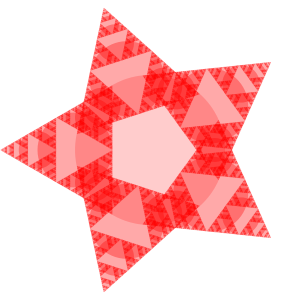

In [7]:
circle_clouds_3(75, 8, 5)

## Problem 3

Write a program to draw the image below.
    
![Problem 3](images/hw08-four-circles.svg)

In [75]:
def fat_donut(x, y, r):
    a = circle(x=x, y=y, r=r)
    b = circle(x=x, y=y, r=r/3)
    return a+b

def circle_bowl(size):
    size = 300
    ring = circle(x=100, y=0, r=size/6)|repeat(4, rotate(90))
    return ring + fat_donut(x=0, y=0, r=size/2)

def mega_circle_bowl(r, n):
    c1=circle(r=r)
    if n>1:
        c2=mega_circle_bowl(r=r/3, n=n-1)
        c3=mega_circle_bowl(r=r/3, n=n-1)|translate(y=r/1.5)|repeat(6, rotate(60))
        return c1+c2+c3
    else:
        return c1

def circle_plate(r, n):
    a = circle(r=r)
    if n>1:
        b = circle_plate(r=r/2.9, n=n-1)|translate(y=-r/2.1)|repeat(4, rotate(90))
        return a+b
    else:
        return a

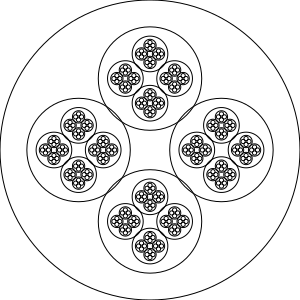

In [76]:
circle_plate(150, 5)

### Problem 4

Consider the following program.

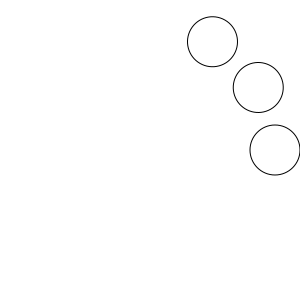

In [34]:
circle(x=125, r=25) | repeat(3, rotate(30))

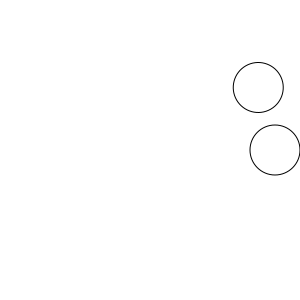

In [43]:
c=circle(x=125, r=25)
c1=c
c2=c+(c1|rotate(30))
c2

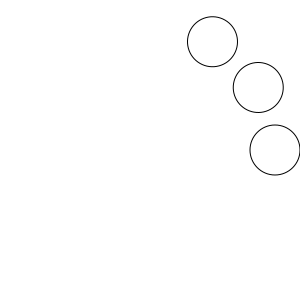

In [41]:
c3=c+(c2|rotate(30))
c3

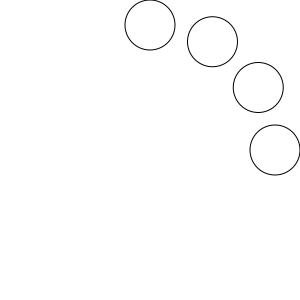

In [42]:
c4=c+(c3|rotate(30))
c4

Can you implement the same without using the `repeat` transformation?

In [44]:
def recursive_circles(x, r, n, angle):
    c = circle(x=x, r=r)
    if n==1:
        return c
    else:
        #cn=c+(cn-1|rotate(angle))
        cn_1 = recursive_circles(x=x, r=r, n=n-1, angle=angle)
        return c+(cn_1|rotate(angle))

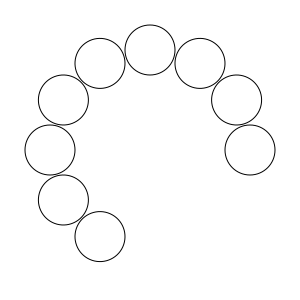

In [46]:
recursive_circles(x=100, r=25, n=9, angle=30)

## Problem 5

Consider the following program.

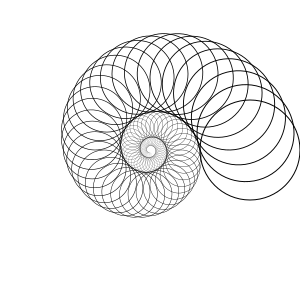

In [47]:
circle(x=100, r=50) | repeat(100, rotate(10) | scale(0.97))

Can you implement the same without using the `repeat` transformation?

Hint: Try if you can write a function `repeat_transform(shape, n, transform)`.

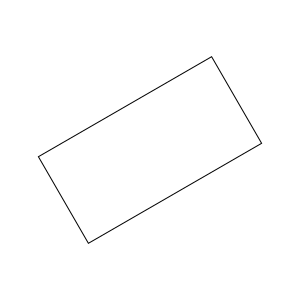

In [49]:
r=rotate(30)
rectangle()|r

In [50]:
def repeat_transform(shape, n, transform):
    return shape|repeat(n, transform)

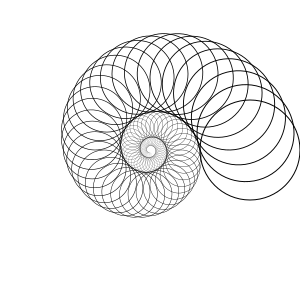

In [51]:
repeat_transform(circle(x=100, r=50), 100, rotate(10)|scale(0.97))

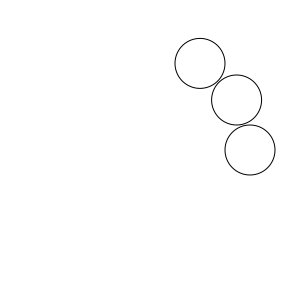

In [55]:
repeat_transform(circle(x=100, r=25), 3, rotate(30))

In [57]:
def repeat_transform(shape, n, transform):
    if n==1:
        return shape
    else:
        #rn=shape+(rn-1|transform)
        rn_1 = repeat_transform(shape, n-1, transform)
        rn = shape+(rn_1|transform)
        return rn

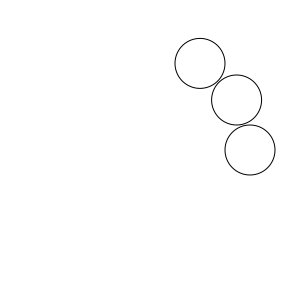

In [61]:
repeat_transform(circle(x=100, r=25), 3, rotate(30))

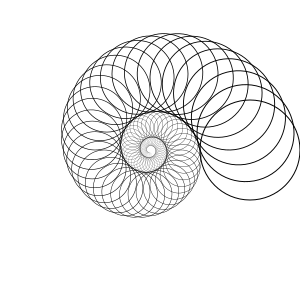

In [62]:
repeat_transform(circle(x=100, r=50), 100, rotate(10)|scale(0.97))

## Problem 6

![](https://mon.school/files/right-split.svg)

As homework, do problems 3 and 6 using recursive functions.